In [699]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [700]:
#np.savez('models_21cm.npz', models=anl.get_blob_from_disk('dTb')[~exclude],
#          freqs=freqs)

In [708]:
models_21cm = np.load('models_21cm.npz')
dTb = models_21cm['models'].T
freqs=models_21cm['freqs']
# exclude models at more then 5 mK at 50 MHz
exclude = (np.abs(dTb[0,:]) >=3) | (np.abs(dTb[-1,:]) >= 3)
dTb = dTb[:,~exclude]

In [709]:
dTb.shape

(200, 885)

Text(0.5, 0, '$\\nu$ [GHz]')

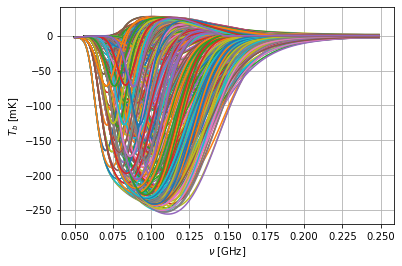

In [710]:
for model in dTb.T:
    plt.plot(freqs, model)
plt.grid()
plt.ylabel('$T_b$ [mK]')
plt.xlabel('$\\nu$ [GHz]')

In [711]:
cov_21cm = np.cov(dTb)

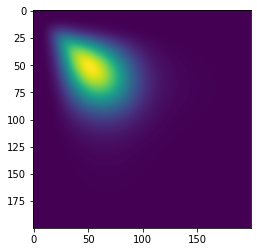

In [712]:
plt.imshow(np.abs(cov_21cm))

In [713]:
evals_21cm, evecs_21cm = np.linalg.eig(cov_21cm + np.identity(cov_21cm.shape[0]) * 1e-14 * np.trace(cov_21cm))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


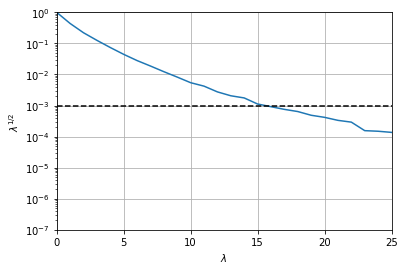

In [714]:
plt.plot(np.sqrt(evals_21cm.T) / np.sqrt(evals_21cm).max())
plt.yscale('log')
plt.ylim(1e-7,1e0)
plt.xlim(0,25)
plt.grid()
plt.xlim()
plt.ylabel('$\\lambda^{1/2}$')
plt.xlabel('$\\lambda$')
plt.axhline(1e-3, ls='--', color='k')

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWar

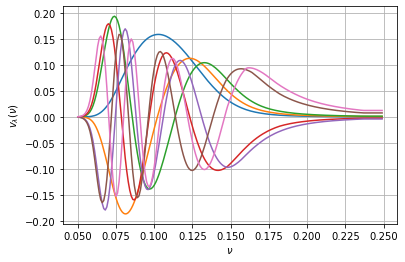

In [715]:
for m in range(7):
    plt.plot(freqs, evecs_21cm.T[m])
#plt.yscale('log')
plt.ylabel('$v_\\lambda(\\nu)$')
plt.xlabel('$\\nu$')
plt.grid()

In [716]:
import healpy as hp
from pygsm import GlobalSkyModel
mygsm = GlobalSkyModel(freq_unit='GHz')

In [717]:
gsm_fullres = np.asarray([mygsm.generate(f) for f in freqs])

In [718]:
#gsm_fullres = np.load('gsm_fullres.npy')
#import healpy as hp
nside=64
gsm_fullres = hp.ud_grade(gsm_fullres, nside_out=nside)
thetas, phis = hp.pix2ang(nside, range(gsm_fullres.shape[1]))


In [355]:
gsm_fullres_wground = copy.deepcopy(gsm_fullres)
gsm_fullres_wground[:, thetas>=np.pi/2.] = 300. 
cov_gsm = np.cov(gsm_fullres_wground)

In [302]:
evals_gsm, evecs_gsm = np.linalg.eig(cov_gsm + 1e-14 * np.trace(cov_gsm)*np.identity(len(freqs)))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


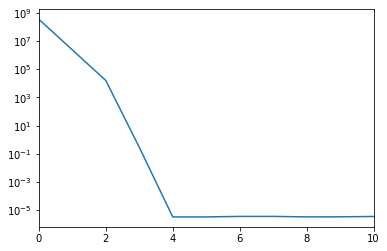

In [303]:
plt.plot(evals_gsm)
plt.xlim(0,10)
plt.yscale('log')

In [189]:
fitmat_gsm = (evecs_gsm.T)[:4].T @ (evecs_gsm.T)[:4]

In [190]:
#rot_gc = hp.Rotator(coord=['G', 'C'])
#rot1 = hp.Rotator(rot=[12*180/24, 0, 0])
#rot2 = hp.Rotator(rot=[0, 30, 0])
#gsm_fullres = rot1.rotate_map_pixel(rot2.rotate_map_pixel(rot_gc.rotate_map_pixel(gsm_fullres)))
 #after rotating, project onto the original spectral eigenvectors to get rid of healpy rotation artifacts.
#gsm_fullres = (fitmat_gsm @ np.array(gsm_fullres))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

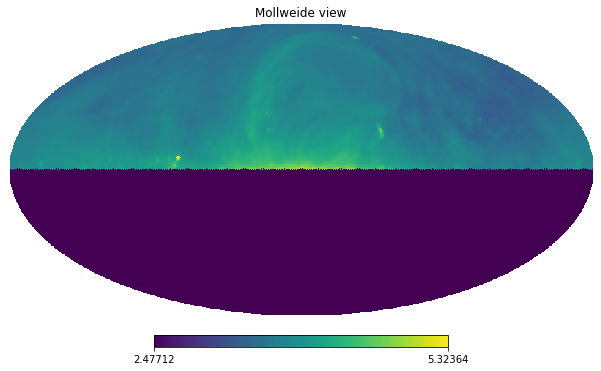

In [191]:
hp.mollview(np.log10(gsm_fullres_wground[0]))

In [192]:
#np.save('gsm_fullres.npy', gsm_fullres)

In [193]:
# see what additional spectral modes downsampling introduces.
#gsm_downres = hp.ud_grade(gsm_fullres, nside_out=16)

In [194]:
#gsm_downres=np.asarray(gsm_downres)
#gsm_cov_downres=np.cov(gsm_downres)


In [195]:
#evals_gsmdr, evecs_gsmdr = np.linalg.eig(gsm_cov_downres+1e-14*np.trace(gsm_cov_downres)*np.identity(len(freqs)))

In [36]:
#plt.plot(np.sqrt(evals_gsmdr/evals_gsmdr.max()))
#plt.yscale('log')
#plt.xlim(0,10)

In [37]:
import scipy.special as sp

In [38]:
np.outer(np.ones(200), np.ones(100)).shape

(200, 100)

In [833]:
kd ** 3.

array([[  1.14862325,   1.14862325,   1.14862325, ...,   1.14862325,
          1.14862325,   1.14862325],
       [  1.21892818,   1.21892818,   1.21892818, ...,   1.21892818,
          1.21892818,   1.21892818],
       [  1.29204494,   1.29204494,   1.29204494, ...,   1.29204494,
          1.29204494,   1.29204494],
       ...,
       [138.47087924, 138.47087924, 138.47087924, ..., 138.47087924,
        138.47087924, 138.47087924],
       [140.15953001, 140.15953001, 140.15953001, ..., 140.15953001,
        140.15953001, 140.15953001],
       [141.86185399, 141.86185399, 141.86185399, ..., 141.86185399,
        141.86185399, 141.86185399]])

In [880]:
D = 1.
C =3e8
#x = np.outer(D * np.pi * freqs * 1e9 / C, np.sin(thetas)) 
#beamcube = (2 * sp.jn(1, x) / x) ** 2.
# use a half wave dipole
tg, fg = np.meshgrid(thetas, freqs)
kd = 2 * np.pi * D  * fg * 1e9 / C
del fg
beamcube = np.abs((np.cos(kd * np.cos(tg) /2) - np.cos(kd/2)) / np.sin(tg)) ** 2. / (kd) ** 2
beamcube[~np.isfinite(beamcube)] = 1.
#beamcube = np.asarray(hp.Rotator(rot=[0, 90, 0]).rotate_map_pixel(beamcube))
del tg
#del x

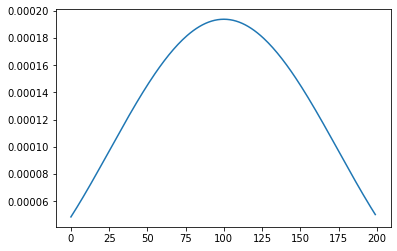

In [881]:
plt.plot(beamcube[:, 0] / np.mean(beamcube))

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

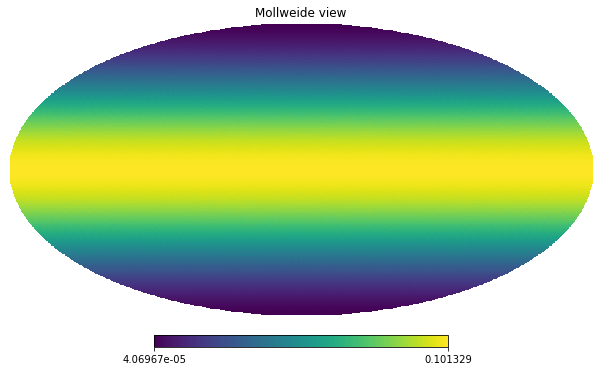

In [882]:
hp.mollview(beamcube[100], rot=[0,0,0])

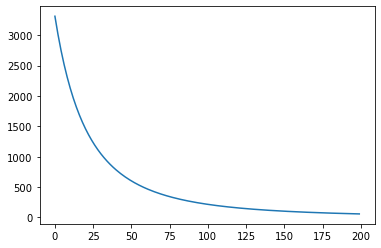

In [883]:
plt.plot(gsm_fullres[:,0])

In [884]:
beamcube_achr = beamcube[100]

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 5.0)

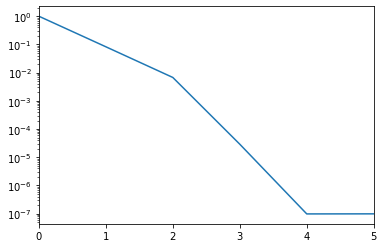

In [885]:
plt.plot(np.sqrt(evals_gsm/evals_gsm.max()))
plt.yscale('log')
plt.xlim(0,5)

In [1013]:
cov_gsm_beam = np.cov(gsm_fullres_wground * beamcube)
evals_gsmb, evecs_gsmb = np.linalg.eig(cov_gsm_beam + np.identity(len(freqs)) * np.trace(cov_gsm_beam) * 1e-16)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1e-07, 1.0)

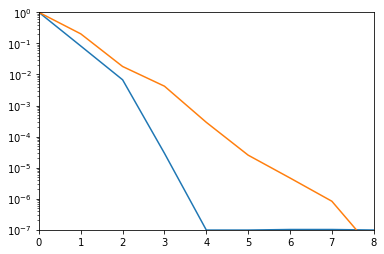

In [887]:
plt.plot(np.sqrt(evals_gsm/evals_gsm.max()))
plt.plot(np.sqrt(evals_gsmb/evals_gsmb.max()))

plt.yscale('log')
plt.xlim(0,8)
plt.ylim(1e-7,1e0)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.01, 1.0)

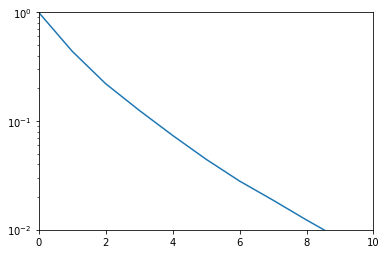

In [888]:
plt.plot(np.sqrt(evals_21cm/evals_21cm.max()))
plt.yscale('log')
plt.xlim(0,10)
plt.ylim(1e-2,1e0)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

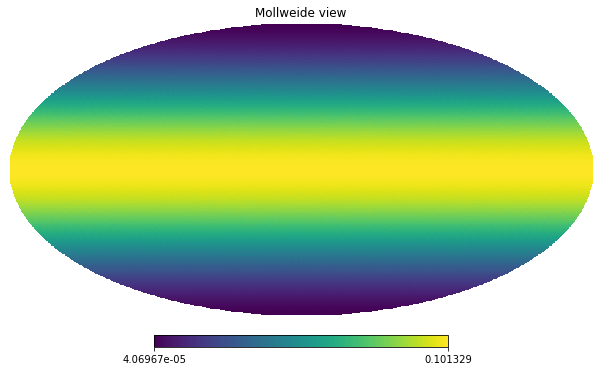

In [889]:
hp.mollview(beamcube[100])

Generate an inverse covariance weighted sky spectrum

In [890]:
#from tqdm import tqdm

In [891]:
lsts = np.arange(0,360, 10)
wghts_a = 0.
wghts = 0.
waterfall_a = np.zeros((len(lsts), len(freqs)))
waterfall = np.zeros((len(lsts), len(freqs)))
spectrum_a = np.zeros_like(freqs)
spectrum = np.zeros_like(spectrum_a)
integration=0
for lst in lsts:
    rot_gc = hp.Rotator(coord=['G', 'C'])
    rot_lat = hp.Rotator(rot=[0, 30, 0])
    rot_lst = hp.Rotator(rot=[lst, 0, 0])
    gsm_obs = copy.deepcopy(gsm_fullres)
    gsm_obs = np.asarray(rot_lat.rotate_map_pixel(rot_lst.rotate_map_pixel(rot_gc.rotate_map_pixel(gsm_obs))))
    gsm_obs[:, (phis>=np.pi/2.) & (phis <= 3 * np.pi / 2.)] = 300.# set below hrzn to 300 K. 
    gsm_obs =  fitmat_gsm @ gsm_obs # project out healpy rotation effects
    waterfall_a[integration] = np.real(np.sum(gsm_obs * beamcube_achr , axis=1))
    waterfall[integration] = np.real(np.sum(gsm_obs * beamcube , axis=1))
    
    
    integration += 1
#waterfall_a = np.load('waterfall_achromatic_beam.npz')['data']
#waterfall = np.load('waterfall_chromatic_airy_beam_1m_aperture.npz')['data']
norm = np.mean(np.sum(beamcube, axis=1))

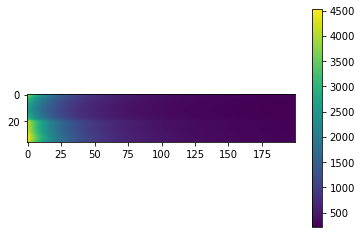

In [892]:
plt.imshow(waterfall_a / norm)
plt.colorbar()

In [893]:
waterfall_a /= norm
waterfall /= norm

In [894]:
#waterfall_a = np.load('waterfall_achromatic_beam.npz')['data']
#waterfall = np.load('waterfall_chromatic_airy_beam_1m_aperture.npz')['data']

In [895]:
np.savez('waterfall_achromatic_beam.npz', data=waterfall_a, freqs=freqs, lsts=lsts)
np.savez('waterfall_chromatic_airy_beam_1m_aperture.npz', data=waterfall, freqs=freqs, lsts=lsts)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


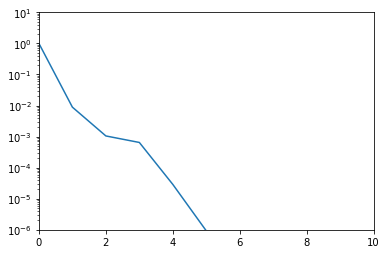

In [963]:
plt.plot(np.sqrt(evals_gsmb / evals_gsmb.max()))
plt.ylim(1e-6, 1e1)
plt.xlim(0,10)
plt.yscale('log')

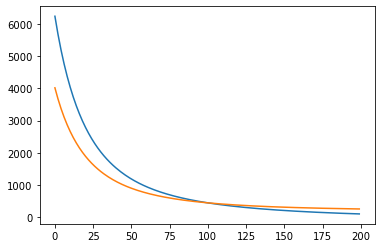

In [1005]:
ffactor = (freqs/.15) **-2.
plt.plot(waterfall[0] * ffactor)
plt.plot(waterfall_a[0])

In [1006]:
cov_wf.shape

(200, 200)

In [1007]:
#cov_wf = np.cov(waterfall.T)
#evals_gsmb, evecs_gsmb = np.linalg.eig(cov_wf + 1e-14 * np.trace(cov_wf) * np.identity(len(freqs)))

In [1040]:
NFG = 4 #number of foreground modes to fit
NBM = 4 # number of beam modes to fit
N21 = 7 # number of 21cm modes to fit
obstime = 200 * 3600
NOBS = 100

Amat = np.vstack([evecs_gsm.T[:NFG], evecs_21cm.T[:N21]])
#print (np.linalg.cond((Amat @ Amat.T)))
Amat_bm = np.vstack([evecs_gsmb.T[:NFG+NBM], evecs_21cm.T[:N21]])
projMat = np.identity(len(freqs)) - (evecs_gsm.T[:NFG]).T @ evecs_gsm.T[:NFG]
projMat_bm = np.identity(len(freqs)) - (evecs_gsmb.T[:NFG + NBM]).T @ evecs_gsmb.T[:NFG+NBM]
Amat_proj_bm = np.vstack([projMat_bm @ ev for ev in evecs_21cm.T[:N21]])
Amat_proj = np.vstack([projMat @ ev for ev in evecs_21cm.T[:N21]])

#print ('%e'%np.linalg.cond((Amat_bm @ Amat_bm.T)))


In [1056]:
model_index = 450
measurements = []
measurements_proj = []
measurements_chr = []
measurements_mod = []
measurements_chr_proj = []
measurements_mod_proj = []
measurements_proj_only = []
for spectrum, spectrum_a in zip(waterfall  , waterfall_a):
    noise_level = (full_temp + 100) / np.sqrt(2 * obstime * 1e9 * np.mean(np.diff(freqs))) 
    wghts = np.diag(1. / (noise_level) ** 2.)
    fitMat = Amat.T[:, NFG:] @ (np.linalg.inv(Amat @ wghts @ Amat.T) @ Amat @ wghts)[NFG:]
    fitMat_bm = Amat_bm.T[:, NFG + NBM:] @ (np.linalg.inv(Amat_bm @ wghts @ Amat_bm.T) @ Amat_bm @ wghts)[NFG + NBM:]
    fitMat_proj = evecs_21cm.T[:N21].T @ np.linalg.inv(Amat_proj @ wghts @ Amat_proj.T) @ Amat_proj  @ wghts @ projMat
    fitMat_proj_bm = evecs_21cm.T[:N21].T @ np.linalg.inv(Amat_proj_bm @ wghts @ Amat_proj_bm.T) @ Amat_proj_bm  @ wghts @ projMat_bm
    
    
    
    for obsnum in range(NOBS):
        full_temp =  spectrum_a + dTb.T[model_index]*1e-3
        full_temp_chr = spectrum  + dTb.T[model_index]*1e-3

        noise = np.random.randn(len(freqs)) * noise_level
        measurement = full_temp + noise
        measurements_proj.append(fitMat_proj @ measurement)
        measurements.append(fitMat @ measurement)
        measurement = full_temp_chr + noise
        measurements_chr.append(fitMat @ measurement)
        measurements_chr_proj.append(fitMat_proj @ measurement)
        measurements_mod.append(fitMat_bm @ measurement)
        measurements_mod_proj.append(fitMat_proj_bm @ measurement)
        measurements_proj_only.append(projMat @ measurement)
        
measurements = np.asarray(measurements)
measurements_chr = np.asarray(measurements_chr)
measurements_mod = np.asarray(measurements_mod)


measurements_proj = np.asarray(measurements_proj)
measurements_chr_proj = np.asarray(measurements_chr_proj)
measurements_mod_proj = np.asarray(measurements_mod_proj)


measurements_proj_only = np.asarray(measurements_proj_only)

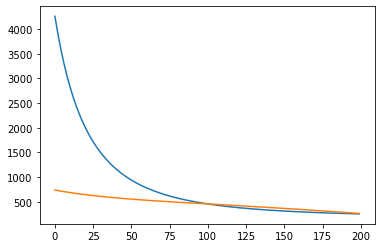

In [1057]:
plt.plot(full_temp)
plt.plot(full_temp_chr)

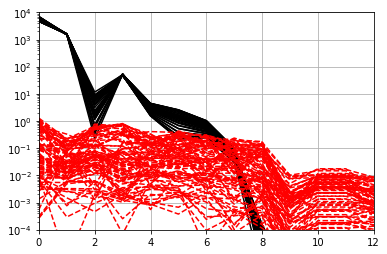

In [1058]:
plt.plot(np.abs(evecs_gsmb.T @ waterfall.T), color='k')
plt.plot(np.abs(evecs_gsmb.T @ dTb[:, ::10]) * 1e-3, ls='--', color='r')

plt.yscale('log')
plt.xlim(0,12)
plt.ylim(1e-4,1e4)
plt.grid()

In [1059]:
np.linalg.matrix_rank(np.vstack([evecs_gsmb.T[:7], evecs_21cm.T[:7]]))

14

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


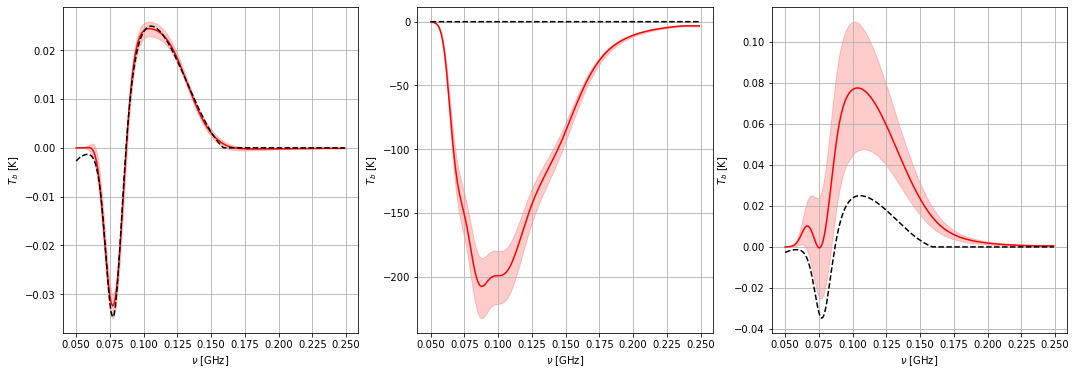

In [1060]:
#plt.plot(freqs, full_temp, color='r', ls='--')
#for measurement in measurements:
#    plt.plot(freqs, measurement.real, ls='-', color='grey', alpha=0.01)
lconf = 2.5
uconf = 97.5
fig, axarr = plt.subplots(1,3)
plt.sca(axarr[0])
mmts = measurements
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[1])
mmts = measurements_chr
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[2])
mmts = measurements_mod
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()


plt.gcf().set_size_inches(18,6)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


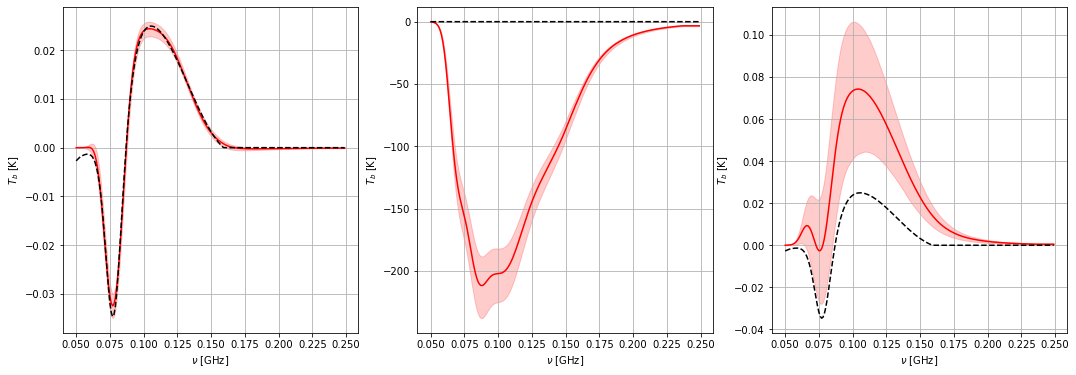

In [1061]:
#plt.plot(freqs, full_temp, color='r', ls='--')
#for measurement in measurements:
#    plt.plot(freqs, measurement.real, ls='-', color='grey', alpha=0.01)
lconf=2.5
uconf=97.5
fig, axarr = plt.subplots(1,3)
plt.sca(axarr[0])
mmts = measurements_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[1])
mmts = measurements_chr_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[2])
mmts = measurements_mod_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()


plt.gcf().set_size_inches(18,6)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


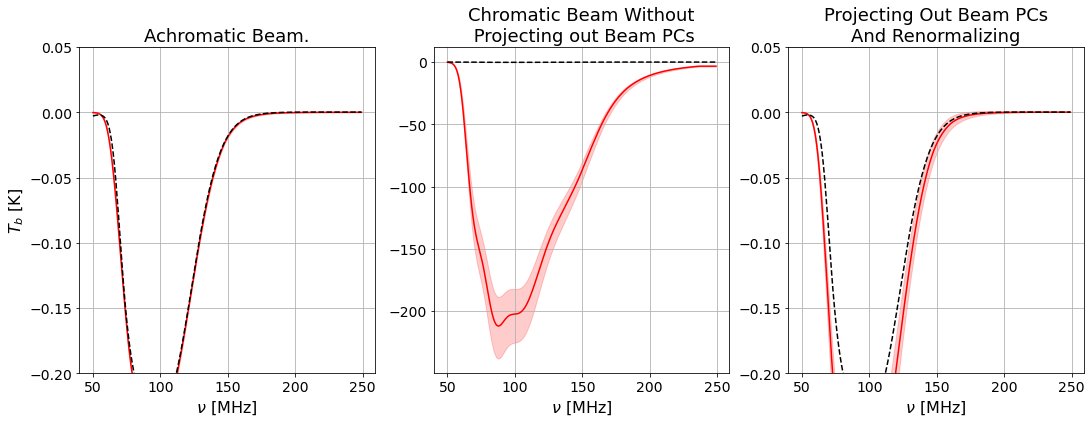

In [1047]:
#plt.plot(freqs, full_temp, color='r', ls='--')
#for measurement in measurements:
#    plt.plot(freqs, measurement.real, ls='-', color='grey', alpha=0.01)
lconf=2.5
uconf=97.5
fig, axarr = plt.subplots(1,3)
plt.sca(axarr[0])
mmts = measurements_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs*1e3, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs*1e3, ml_line, color='r')
plt.plot(freqs*1e3, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
plt.ylabel('$T_b$ [K]', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.title('Achromatic Beam.', fontsize=18)

plt.ylim(-0.2,0.05)


plt.grid()

plt.sca(axarr[1])
mmts = measurements_chr_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs*1e3, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs*1e3, ml_line, color='r')
plt.plot(freqs*1e3, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
#plt.ylabel('$T_b$ [K]', fontsize=16)
plt.title('Chromatic Beam Without\n Projecting out Beam PCs', fontsize=18)
plt.gca().tick_params(labelsize=14)

plt.grid()

plt.sca(axarr[2])
mmts = measurements_mod_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs*1e3, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs*1e3, ml_line, color='r')
plt.plot(freqs*1e3, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
#plt.ylabel('$T_b$ [K]', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.grid()
plt.ylim(-0.2,0.05)
plt.title('Projecting Out Beam PCs\nAnd Renormalizing', fontsize=18)
plt.gcf().set_size_inches(18,6)
plt.savefig('Fitting_Figure.pdf', bbox_inches='tight')

In [1048]:
full_temp

array([4258.93174412, 4070.33185767, 3893.723208  , 3728.13948237,
       3572.7081294 , 3426.63989942, 3289.21944152, 3159.79727703,
       3037.78270641, 2922.6376051 , 2813.87094911, 2711.03399816,
       2613.71603934, 2521.54063463, 2434.16233643, 2351.26367691,
       2272.55271271, 2197.76055952, 2126.63938188, 2058.96050844,
       1994.5126464 , 1933.10016981, 1874.54191383, 1818.66963147,
       1765.32708038, 1714.36884845, 1665.65959822, 1619.0731957 ,
       1574.49204088, 1531.8063763 , 1490.91371067, 1451.71823743,
       1414.13036386, 1378.06620957, 1343.4471974 , 1310.19966618,
       1278.25450532, 1247.54682028, 1218.01563881, 1189.60363567,
       1162.25686337, 1135.92453539, 1110.55879336, 1086.11452562,
       1062.54916932, 1039.82254373, 1017.89670248,  996.73577732,
        976.30584981,  956.57482427,  937.51231912,  919.08955034,
        901.27923875,  884.05551407,  867.39383195,  851.27089292,
        835.66456686,  820.55382425,  805.9186725 ,  791.74009

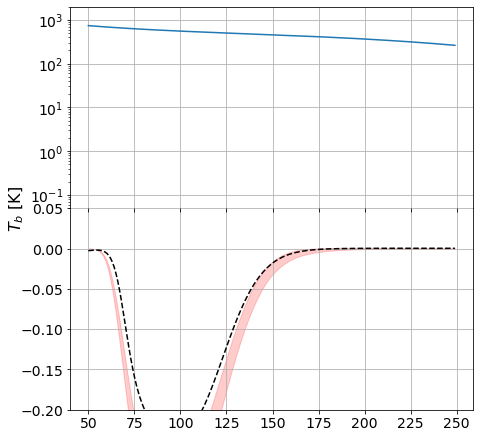

In [1049]:
fig = plt.figure()
linax = fig.add_axes([.1,.1,.8, .4])
logax = fig.add_axes([.1, .5, .8, .4])
linax.plot(freqs*1e3, dTb.T[model_index]*1e-3, color='k', ls='--' )
logax.plot(freqs*1e3, full_temp_chr)
plt.sca(linax)
mmts = measurements_mod_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs*1e3, ll_line, ul_line, color='r', alpha=.2)

plt.sca(logax)

logax.set_yscale('log')
logax.set_ylim(0.05, 2e3)
linax.set_ylim(-0.2, 0.05)
linax.spines['top'].set_visible(False)
logax.spines['bottom'].set_visible(False)
logax.set_xticklabels([])
logax.grid()
linax.grid()
plt.ylabel('$T_b$ [K]', fontsize=16, y=0)
linax.tick_params(labelsize=14)
logax.tick_params(labelsize=14)
plt.gcf().set_size_inches(7,7)

Try doing multile times.

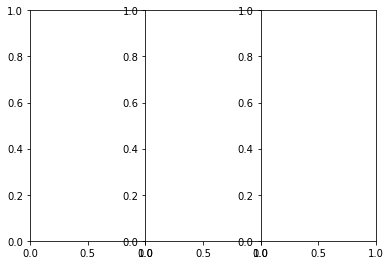

In [1050]:
#plt.plot(freqs, full_temp, color='r', ls='--')
#for measurement in measurements:
#    plt.plot(freqs, measurement.real, ls='-', color='grey', alpha=0.01)
lconf=2.5
uconf=97.5
fig=plt.figure()
axarr = [fig.add_axes([0.1,0.1,.8/3.,.8]), fig.add_axes([.1+.8/3, .1, .8/3, .8]), 
         fig.add_axes([.1+1.6/3., .1, .8/3, .8])]

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


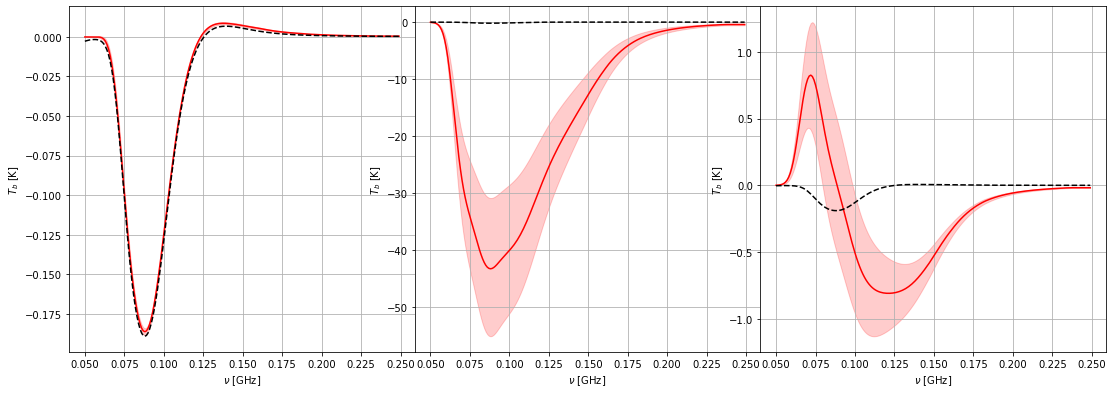

In [980]:
plt.sca(axarr[0])
mmts = measurements_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[1])
mmts = measurements_chr_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()

plt.sca(axarr[2])
mmts = measurements_mod_proj
ml_line = np.array([np.percentile(mmts[:, m].real, 50) for m in range(len(freqs))])
ul_line = np.array([np.percentile(mmts[:, m].real, uconf) for m in range(len(freqs))])
ll_line = np.array([np.percentile(mmts[:, m].real, lconf) for m in range(len(freqs))])
ml_line = np.mean(mmts, axis=0)
plt.fill_between(freqs, ll_line, ul_line, color='r', alpha=.2)
plt.plot(freqs, ml_line, color='r')
plt.plot(freqs, dTb.T[model_index]*1e-3, color='k', ls='--' )
plt.xlabel('$\\nu$ [GHz]')
plt.ylabel('$T_b$ [K]')
plt.grid()


plt.gcf().set_size_inches(18,6)

$V(\nu) = \sum a_{fg} v_{fg}(\nu) + \sum a_{21} v_{21}(\nu)$

OK, now I've got the foreground covariances involved. That was why there were significant biases before :)

In [731]:
import matplotlib.cm as cm

In [732]:
dTb.shape

(200, 885)

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWar

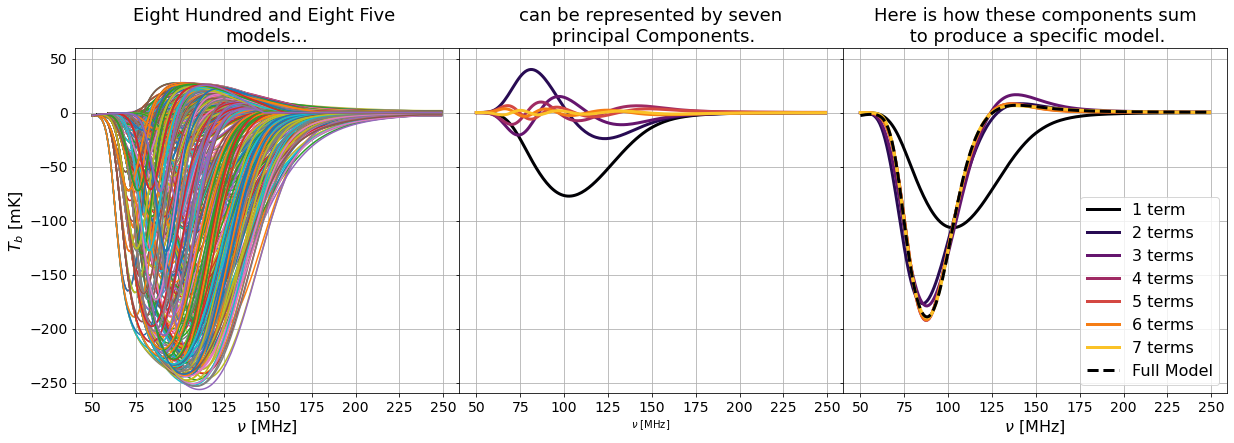

In [733]:
fig = plt.figure()
axarr = [fig.add_axes([.1, .1, .8/3., .8]), 
         fig.add_axes([.1+.8/3, .1, .8/3., .8]), 
         fig.add_axes([.1 + 2*.8/3., .1, .8/3.,.8])]
#fig, axarr = plt.subplots(1,3)
plt.sca(axarr[0])
plt.title('Eight Hundred and Eight Five \nmodels...', fontsize=18)
for m in range(0,dTb.shape[1], 1):
    plt.plot(freqs*1e3, dTb[:, m])
plt.ylim(-260,60)
plt.grid()
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
plt.ylabel('$T_b$ [mK]', fontsize=16)
plt.gca().tick_params(labelsize=14)

plt.sca(axarr[1])
colors=[cm.inferno(m/N21) for m in range(N21)]
plt.title('can be represented by seven\n principal Components.', fontsize=18)
for m in range(N21):
    plt.plot(freqs*1e3, evecs_21cm.T[m] * -np.sqrt(evals_21cm[m]), color=colors[m], lw=3)
plt.grid()
plt.xlabel('$\\nu$ [MHz]')
plt.ylim(-260,60)
plt.gca().set_yticklabels([])
plt.gca().tick_params(labelsize=14)

plt.sca(axarr[2])
plt.ylim(-260,60)
example = dTb[:, model_index]
buildup = np.zeros(len(freqs), dtype=complex)
plt.gca().tick_params(labelsize=14)
plt.title('Here is how these components sum\n to produce a specific model.', fontsize=18)
for m in range(N21):
    buildup += evecs_21cm.T[m] * (evecs_21cm.T[m] @ example)
    label = '%d term'%(m+1)
    if m > 0:
        label += 's'
    plt.plot(freqs*1e3, buildup.real, color=colors[m], lw=3, label=label)
plt.plot(freqs*1e3, example, ls='--', color='k', lw=3, label='Full Model')
plt.legend(loc ='best', fontsize=16)
plt.grid()
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
fig.set_size_inches(20, 6)
plt.gca().set_yticklabels([])
plt.savefig('principal_components_21cm.pdf', bbox_inches='tight')

In [734]:
NFG+NBM

8

In [982]:
dot_prod_matrix = np.zeros((NFG+NBM+N21, NFG+NBM+N21))
for j in range(NFG+NBM+N21):
    for i in range(NFG+NBM+N21):
        if i < NFG+NBM:
            v1 = evecs_gsmb.T[i]
        else:
            v1 = evecs_21cm.T[i - NFG - NBM ]
        if j < NFG+NBM:
            v2 = evecs_gsmb.T[j]
        else:
            v2 = evecs_21cm.T[j - NFG - NBM ]
        dot_prod_matrix[i,j] = np.dot(v1, v2)

<ipython-input-982-e7e77a8c5e1b>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  dot_prod_matrix[i,j] = np.dot(v1, v2)


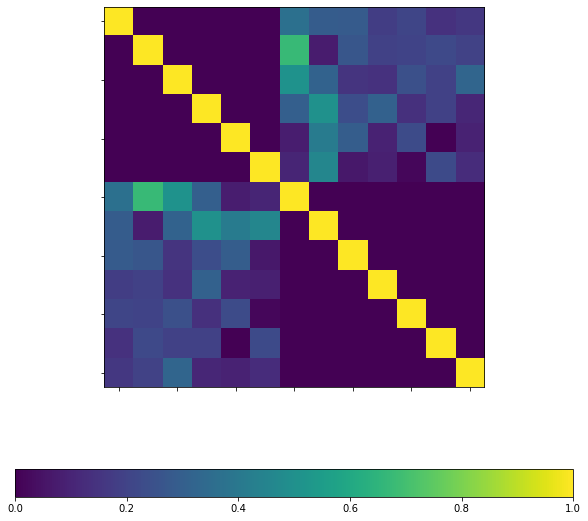

In [983]:
plt.imshow(np.abs(dot_prod_matrix), interpolation='nearest')
plt.colorbar(orientation='horizontal')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gcf().set_size_inches(10,10)
plt.savefig('principal_component_dot_product_matrix_abs.png', bbox_inches='tight')

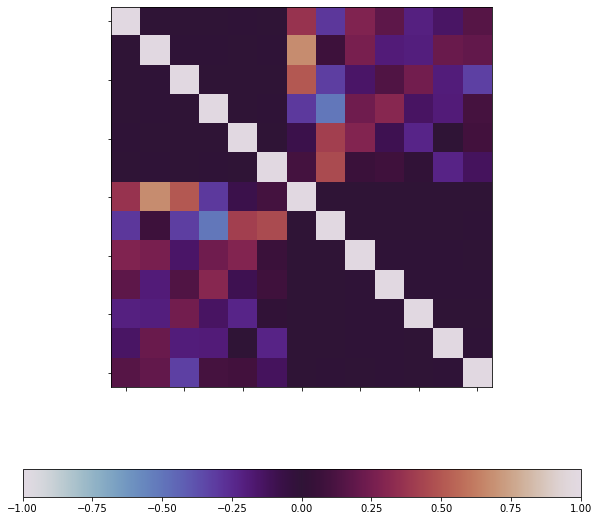

In [984]:
plt.imshow(np.real(dot_prod_matrix), interpolation='nearest', cmap='twilight', vmin=-1, vmax=1)
plt.colorbar(orientation='horizontal')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gcf().set_size_inches(10,10)
plt.savefig('principal_component_dot_product_matrix.png', bbox_inches='tight')

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWar

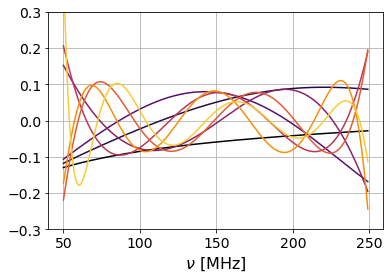

In [738]:
colors = [cm.inferno(m/(NBM+NFG)) for m in range(NBM+NFG)]
for i in range(NBM+NFG):
    plt.plot(freqs * 1e3, evecs_gsmb.T[i], color=colors[i])
plt.ylim(-0.3, 0.3)
plt.grid()
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
plt.savefig('eigenmodes_foreground.pdf')
plt.gca().tick_params(labelsize=14)
plt.savefig('fg_principal_components.png', bbox_inches='tight')

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWar

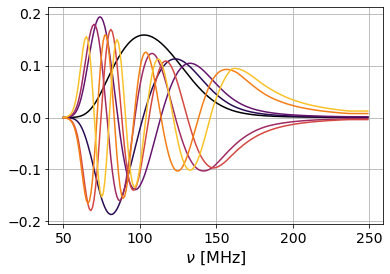

In [739]:
colors = [cm.inferno(m/(N21)) for m in range(N21)]
for i in range(N21):
    plt.plot(freqs*1e3, evecs_21cm.T[i], color=colors[i])
plt.grid()
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.savefig('21cm_principal_components.png', bbox_inches='tight')

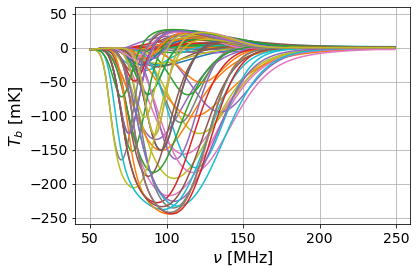

In [740]:
for m in range(0,dTb.shape[1], 10):
    plt.plot(freqs*1e3, dTb[:, m])
plt.ylim(-260,60)
plt.grid()
plt.xlabel('$\\nu$ [MHz]', fontsize=16)
plt.ylabel('$T_b$ [mK]', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.savefig('21cm_signals.png')

/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/aaronew/science/miniconda3/envs/chic/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

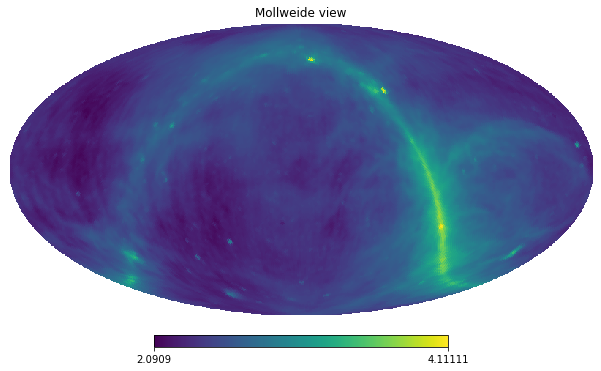

In [741]:
hp.mollview(np.log10(rot_gc.rotate_map_pixel(gsm_fullres[100])), rot=[0,0,0])
plt.savefig('foregrounds_mollweide.png', bbox_inches='tight')

In [742]:
import scipy.interpolate as interp

In [743]:
NX = 800
lmat, mmat = np.meshgrid(np.linspace(-1,1,NX), np.linspace(-1,1,NX))
lvec = (np.sin(thetas) * np.cos(phis))[thetas<np.pi/2]
mvec = (np.sin(thetas) * np.sin(phis))[thetas<np.pi/2]
pts = np.array([[l,m] for l,m in zip(lvec,mvec)])
rotator = hp.Rotator(rot=[0,-90,0])
xi = np.array([[l,m] for l,m in zip(lmat.flatten(), mmat.flatten())])
orthproj = interp.griddata(pts, 10**np.log10(rotator.rotate_map_pixel(gsm_obs[100] * beamcube[100]))[thetas<np.pi/2], 
                           xi, method='nearest')
orthproj_beam =  interp.griddata(pts, rotator.rotate_map_pixel(beamcube[100])[thetas<np.pi/2] / rotator.rotate_map_pixel(beamcube[100])[thetas<np.pi/2].max(), 
                           xi, method='nearest')
orthproj[np.linalg.norm(xi, axis=1) >=1.]=np.nan
orthproj_beam[np.linalg.norm(xi, axis=1) >=1.]=np.nan

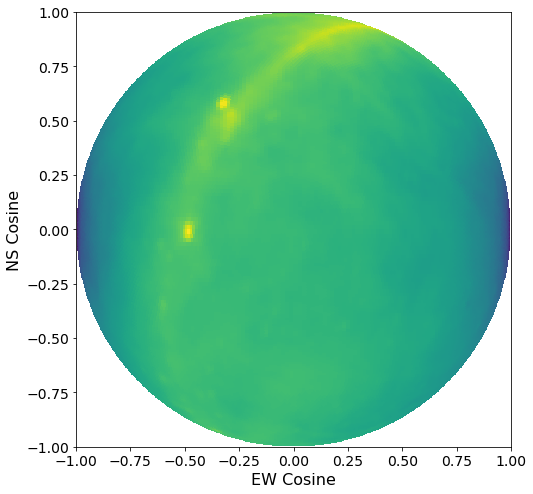

In [744]:
plt.imshow(np.log10(orthproj.reshape(NX,NX).real), interpolation='nearest', extent=[-1,1,-1,1])
#plt.colorbar()
#plt.contour(orthproj_beam.reshape(NX,NX).real, levels=[.5, .9], ls='--')
plt.xlabel('EW Cosine', fontsize=16)
plt.ylabel('NS Cosine', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.gcf().set_size_inches(8,8)
plt.savefig('fg_orthproj.png', bbox_inches='tight')

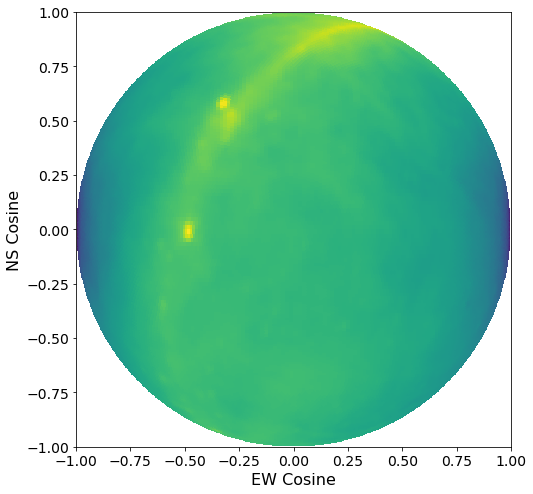

In [745]:
plt.imshow(np.log10(orthproj.reshape(NX,NX).real), interpolation='nearest', extent=[-1,1,-1,1])
#plt.colorbar()
#plt.contour(orthproj_beam.reshape(NX,NX).real, levels=[.5, .9], ls='--')
plt.xlabel('EW Cosine', fontsize=16)
plt.ylabel('NS Cosine', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.gcf().set_size_inches(8,8)
plt.savefig('fg_orthproj.png', bbox_inches='tight')

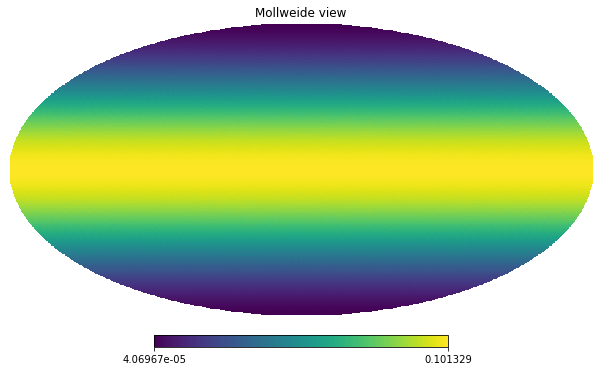

In [746]:
hp.mollview(beamcube[100])